# Problem : Memprediksi Kelulusan Siswa

### 1. Task Understanding (Examine your problem) :
Problem: memprediksi kelulusan siswa 

Success criteria: minimum error (kelulusan antara estimasi dan realita)

Analytic approach: predictive

### 2. Data Understanding and Preparation (Prepare your data) : 
2.1. Identify and fix incorrectness of data type assignment

2.2. Identify and fix noise or inconsistent data

2.3. Identify and fix missing values

2.4. Identify and fix outliers

2.5. Identify and fix imbalanced dataset

In [1]:
# mengimport libraries yang diperlukan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Deskripsi Dataset

Dataset ini merupakan data dari dua sekolah di Portugis yang berisikan data siswa yang terdiri dari 33 attribute dan 649 instance.

In [2]:
# load dataset

student = pd.read_csv("0. DATASET_FINAL PROJECT/student-por.csv", sep=';')
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
# mengetahui size data

student.shape

(649, 33)

### 2.1. Identify and fix incorrectness of data type assignment

In [4]:
# mengetahui tipe data dari atribut, mengidentifikasi tipe data yang tidak tepat

student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

### 2.2. Identify and fix noise or inconsistent data dan missing value

In [5]:
# mengidentifikasi noise atau inconsistent data dan missing value

print("GP = Gabriel Pereira; MS = Mousinho da Silveira")
student['school'].value_counts()

GP = Gabriel Pereira; MS = Mousinho da Silveira


GP    423
MS    226
Name: school, dtype: int64

In [6]:
# mengidentifikasi noise atau inconsistent data dan missing value

student['sex'].value_counts()

F    383
M    266
Name: sex, dtype: int64

In [7]:
# mengidentifikasi noise atau inconsistent data dan missing value

student['age'].value_counts()

17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: age, dtype: int64

In [8]:
# mengidentifikasi noise atau inconsistent data dan missing value

print("U = Urban; R=Rural")
student['address'].value_counts()


U = Urban; R=Rural


U    452
R    197
Name: address, dtype: int64

In [9]:
# mengidentifikasi noise atau inconsistent data dan missing value

print("GT3 = Greater than 3; LE = lower or equal")
student['famsize'].value_counts()

GT3 = Greater than 3; LE = lower or equal


GT3    457
LE3    192
Name: famsize, dtype: int64

In [10]:
# mengidentifikasi noise atau inconsistent data dan missing value

print("T = living together; A = living apart")
student['Pstatus'].value_counts()

T = living together; A = living apart


T    569
A     80
Name: Pstatus, dtype: int64

In [11]:
# mengidentifikasi noise atau inconsistent data dan missing value

print("T = living together; A = living apart")
student['Medu'].value_counts()

T = living together; A = living apart


2    186
4    175
1    143
3    139
0      6
Name: Medu, dtype: int64

In [12]:
student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


### 2.3. Identify and fix outliers

In [13]:
# mengidentifikasi outliers
for att in student.columns:
    if (student[att].dtypes =='int64'):
        print('\nAttribute-',att,':',student[att].dtypes)
        Q1=student[att].quantile(0.25)
        print('Q1',Q1)
        Q3=student[att].quantile(0.75)
        print('Q3',Q3)
        IQR=Q3-Q1
        print('IQR',IQR)
        min=student[att].min()
        max=student[att].max()
        min_IQR=Q1-1.5*IQR
        max_IQR=Q3+1.5*IQR
        if (min<min_IQR):
            print('Low outlier is found')
        if (max>max_IQR):
            print('High outlier is found')


Attribute- age : int64
Q1 16.0
Q3 18.0
IQR 2.0
High outlier is found

Attribute- Medu : int64
Q1 2.0
Q3 4.0
IQR 2.0

Attribute- Fedu : int64
Q1 1.0
Q3 3.0
IQR 2.0

Attribute- traveltime : int64
Q1 1.0
Q3 2.0
IQR 1.0
High outlier is found

Attribute- studytime : int64
Q1 1.0
Q3 2.0
IQR 1.0
High outlier is found

Attribute- failures : int64
Q1 0.0
Q3 0.0
IQR 0.0
High outlier is found

Attribute- famrel : int64
Q1 4.0
Q3 5.0
IQR 1.0
Low outlier is found

Attribute- freetime : int64
Q1 3.0
Q3 4.0
IQR 1.0
Low outlier is found

Attribute- goout : int64
Q1 2.0
Q3 4.0
IQR 2.0

Attribute- Dalc : int64
Q1 1.0
Q3 2.0
IQR 1.0
High outlier is found

Attribute- Walc : int64
Q1 1.0
Q3 3.0
IQR 2.0

Attribute- health : int64
Q1 2.0
Q3 5.0
IQR 3.0

Attribute- absences : int64
Q1 0.0
Q3 6.0
IQR 6.0
High outlier is found

Attribute- G1 : int64
Q1 10.0
Q3 13.0
IQR 3.0
Low outlier is found
High outlier is found

Attribute- G2 : int64
Q1 10.0
Q3 13.0
IQR 3.0
Low outlier is found
High outlier is found

Attri

Text(0.5, 1.0, 'basic plot')

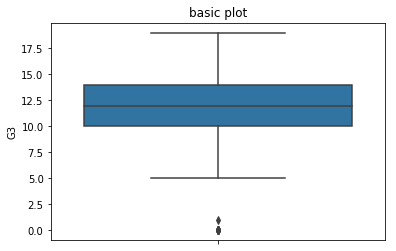

In [14]:
# Make boxplot for one group only
sns.boxplot(y=student['G3']).set_title('basic plot')

Text(0.5, 1.0, 'basic plot')

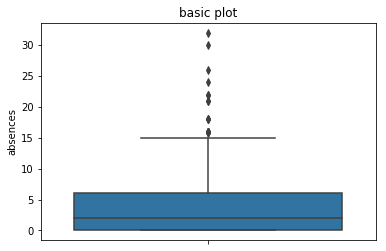

In [15]:
# Make boxplot for one group only
sns.boxplot(y=student['absences']).set_title('basic plot')

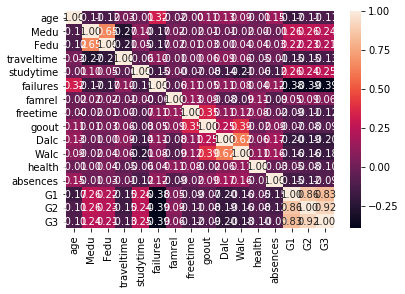

In [16]:
corr = student.corr()
sns.heatmap(corr, annot=True, fmt='.2f')

### Pre-Processing : Feature Extraction

Karena kita ingin memprediksi siswa lulus atau tidak, maka kita harus membuat standard kelulusan. G3 sendiri meiliki rata-rata 11.9 (dibulatkan menjadi 12). Untuk siswa yang memiliki nilai G3>=12 maka Passed, untuk siswa yang memiliki nilai G3<12 maka Failed.

Kita akan membuat attribut baru yaitu 'decision'

In [17]:
# Feature Extraction

student['decision'] = student.apply(lambda row : 'Pass' if (row['G3']>=12) else 'Fail', axis=1)
student.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,decision
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,Fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,Fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,Pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,Pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,Pass


In [18]:
# One-hot Encoding
student_onehot = student
for att in (student_onehot.columns):
    if student_onehot[att].dtypes == 'O':
        student_onehot = pd.get_dummies(data=student_onehot, columns=[att])
        student_onehot.append(student_onehot)

student_onehot.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,decision_Fail,decision_Pass
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,1,1,0,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,0,1,0,1,1,0,1,0
2,15,1,1,1,2,0,4,3,2,2,...,0,1,0,1,0,1,1,0,0,1
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,0,1,0,1,1,0,1,0,0,1


In [19]:
student_onehot.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes', 'decision_Fail', 'decision_Pass'],
      dtype='object')

In [20]:
student.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'decision'],
      dtype='object')

In [21]:
# Label Encoder

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

student_le = student
for attribute in student_le.columns:
    if student_le[attribute].dtypes == 'O':
        le.fit(student_le[attribute])
        student_le[attribute] = le.transform(student_le[attribute])

student_le.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,decision
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,4,0,11,11,0
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,2,9,11,11,0
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,6,12,13,12,1
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,0,14,14,14,1
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,0,11,13,13,1


### Menentukan Algoritma Machine Learning yang akan Digunakan

In [22]:
# mengimport packages yang diperlukan

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [23]:
# define the dictionary of models our script can use
# the key to the dictionary is the name of the model
# (supplied via command line argument) and the value is the model itself

models = {
    "knn": KNeighborsClassifier(n_neighbors=1),
    "naive_bayes": GaussianNB(),
    "logit": LogisticRegression(solver="lbfgs", multi_class="auto"),
    "svm": SVC(kernel="rbf", gamma="auto"),
    "decision_tree": DecisionTreeClassifier(),
    "random_forest": RandomForestClassifier(n_estimators=100),
}

In [24]:
# membagi data menjadi data training dan testing

x_train, x_test, y_train, y_test = train_test_split(np.array(student_le.loc[:,:'G2']), student_le['decision'], random_state=None, test_size=0.20)

In [25]:
# make predictions on our data and show a classification report
from sklearn import metrics
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(n_estimators=100).fit(x_train, y_train)
predicted = clf.predict(x_test)
print(classification_report(y_test, predicted))

print("[INFO] using : random_fores")
print("Akurasi RandomForest : ", metrics.accuracy_score(y_test, predicted))
print("Confusion Matrix : ", '\n', confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        55
           1       0.93      0.92      0.93        75

    accuracy                           0.92       130
   macro avg       0.91      0.91      0.91       130
weighted avg       0.92      0.92      0.92       130

[INFO] using : random_fores
Akurasi RandomForest :  0.9153846153846154
Confusion Matrix :  
 [[50  5]
 [ 6 69]]


### K-Fold Cross Valudation

In [26]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=)
X = student_le.loc[:,:'G2']
y = student_le['decision']
kf.get_n_splits(X)

5

In [50]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=8)
X = student_le.loc[:,:'G2']
y = student_le['decision']
kf.get_n_splits(X)

8

In [52]:
i = 1
score = 0
comat = [[0,0],[0,0]]

for train_index, test_index in kf.split(X):
#     print('\nFold ke-', i)
    x_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    
    clf = RandomForestClassifier(n_estimators=100).fit(x_train, y_train)
    predicted = clf.predict(x_test)
#     print(classification_report(y_test, predicted))
#     print("[INFO] using : random_forest")
#     print("Akurasi RandomForest : ", metrics.accuracy_score(y_test, predicted))
#     print("Confusion Matrix : ", '\n', confusion_matrix(y_test, predicted))
    i += 1
    score += metrics.accuracy_score(y_test, predicted)
    comat += confusion_matrix(y_test, predicted)
    

print("\nNilai Rata-Rata")
print("\nAkurasi : ", score/kf.get_n_splits(X))
print("True Positif (TP) : ", comat[0][0]/kf.get_n_splits(X))
print("False Positif (FP) : ", comat[0][1]/kf.get_n_splits(X))
print("False Negative (FN) : ", comat[1][0]/kf.get_n_splits(X))
print("True Negative (FN) : ", comat[1][1]/kf.get_n_splits(X))


Nilai Rata-Rata

Akurasi :  0.9337737127371273
True Positif (TP) :  36.25
False Positif (FP) :  1.375
False Negative (FN) :  4.0
True Negative (FN) :  39.5


In [53]:
i = 1
for train_index, test_index in kf.split(X):
#     print('\nFold ke-', i)
    x_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    
    clf = KNeighborsClassifier(n_neighbors=1).fit(x_train, y_train)
    predicted = clf.predict(x_test)
#     print(classification_report(y_test, predicted))
#     print("[INFO] using : KNN")
#     print("Akurasi KNN : ", metrics.accuracy_score(y_test, predicted))
#     print("Confusion Matrix : ", '\n', confusion_matrix(y_test, predicted))
    i += 1
    
print("\nNilai Rata-Rata")
print("\nAkurasi : ", score/kf.get_n_splits(X))
print("True Positif (TP) : ", comat[0][0]/kf.get_n_splits(X))
print("False Positif (FP) : ", comat[0][1]/kf.get_n_splits(X))
print("False Negative (FN) : ", comat[1][0]/kf.get_n_splits(X))
print("True Negative (FN) : ", comat[1][1]/kf.get_n_splits(X))


Nilai Rata-Rata

Akurasi :  0.9337737127371273
True Positif (TP) :  36.25
False Positif (FP) :  1.375
False Negative (FN) :  4.0
True Negative (FN) :  39.5


In [54]:
i = 1
for train_index, test_index in kf.split(X):
#     print('\nFold ke-', i)
    x_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    
    clf = LogisticRegression(solver="lbfgs", multi_class="auto").fit(x_train, y_train)
    predicted = clf.predict(x_test)
#     print(classification_report(y_test, predicted))

#     print("[INFO] using : Logit")
#     print("Akurasi Logit : ", metrics.accuracy_score(y_test, predicted))
#     print("Confusion Matrix : ", '\n', confusion_matrix(y_test, predicted))
    i += 1
    
print("\nNilai Rata-Rata")
print("\nAkurasi : ", score/kf.get_n_splits(X))
print("True Positif (TP) : ", comat[0][0]/kf.get_n_splits(X))
print("False Positif (FP) : ", comat[0][1]/kf.get_n_splits(X))
print("False Negative (FN) : ", comat[1][0]/kf.get_n_splits(X))
print("True Negative (FN) : ", comat[1][1]/kf.get_n_splits(X))

C:\Users\labdas.DESKTOP-PR1HO9I\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\labdas.DESKTOP-PR1HO9I\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\labdas.DESKTOP-PR1HO9I\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\labdas.DESKTOP-PR1HO9I\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\labdas.DESKTOP-PR1HO9I\AppData\Roaming\Pyth


Nilai Rata-Rata

Akurasi :  0.9337737127371273
True Positif (TP) :  36.25
False Positif (FP) :  1.375
False Negative (FN) :  4.0
True Negative (FN) :  39.5


C:\Users\labdas.DESKTOP-PR1HO9I\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\labdas.DESKTOP-PR1HO9I\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [37]:
a=confusion_matrix(y_test, predicted)
a

array([[75,  7],
       [ 3, 44]], dtype=int64)

In [38]:
a[1][0]

3

### Menentukan Model yang Cocok

Mencoba 5 algoritma, memilih yang paling sesuai

In [1]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
X = student_le.loc[:,:'G2']
y = student_le['decision']
kf.get_n_splits(X)

i = 1
for train_index, test_index in kf.split(X):
#     print('\nFold ke-', i)
    x_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    
    clf = LogisticRegression(solver="lbfgs", multi_class="auto").fit(x_train, y_train)
    predicted = clf.predict(x_test)
#     print(classification_report(y_test, predicted))
#     print("[INFO] using : Logit")
#     print("Akurasi Logit : ", metrics.accuracy_score(y_test, predicted))
#     print("Confusion Matrix : ", '\n', confusion_matrix(y_test, predicted))
    i += 1
    
print("\nNilai Rata-Rata")
print("\nAkurasi : ", score/kf.get_n_splits(X))
print("True Positif (TP) : ", comat[0][0]/kf.get_n_splits(X))
print("False Positif (FP) : ", comat[0][1]/kf.get_n_splits(X))
print("False Negative (FN) : ", comat[1][0]/kf.get_n_splits(X))
print("True Negative (FN) : ", comat[1][1]/kf.get_n_splits(X))

NameError: name 'student_le' is not defined

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
X = student_le.loc[:,:'G2']
y = student_le['decision']
kf.get_n_splits(X)

for mod in range(len(models)):
    i = 1
    for train_index, test_index in kf.split(X):
    #     print('\nFold ke-', i)
        x_train = X.iloc[train_index]
        y_train = y.iloc[train_index]
        x_test = X.iloc[test_index]
        y_test = y.iloc[test_index]

        clf = models[][1].fit(x_train, y_train)
        predicted = clf.predict(x_test)
    #     print(classification_report(y_test, predicted))
    #     print("[INFO] using : Logit")
    #     print("Akurasi Logit : ", metrics.accuracy_score(y_test, predicted))
    #     print("Confusion Matrix : ", '\n', confusion_matrix(y_test, predicted))
        i += 1

    print("\nNilai Rata-Rata")
    print("\nAkurasi : ", score/kf.get_n_splits(X))
    print("True Positif (TP) : ", comat[0][0]/kf.get_n_splits(X))
    print("False Positif (FP) : ", comat[0][1]/kf.get_n_splits(X))
    print("False Negative (FN) : ", comat[1][0]/kf.get_n_splits(X))
    print("True Negative (FN) : ", comat[1][1]/kf.get_n_splits(X))